In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Import Data

In [3]:
df = pd.read_csv("data/iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset Splitting

In [5]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 4), (53, 4), (97,), (53,))

# Training

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
87,6.7,3.1,4.7,1.5
18,5.1,3.5,1.4,0.3
137,6.3,3.4,5.6,2.4
92,6.1,3.0,4.6,1.4
7,4.6,3.4,1.4,0.3


In [9]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class="multinomial", solver='lbfgs', n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s


{'algo__C': 1.2173252504194063, 'algo__fit_intercept': False}
0.9690721649484536 0.96875 0.9622641509433962


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.4s finished


### Feature Importance


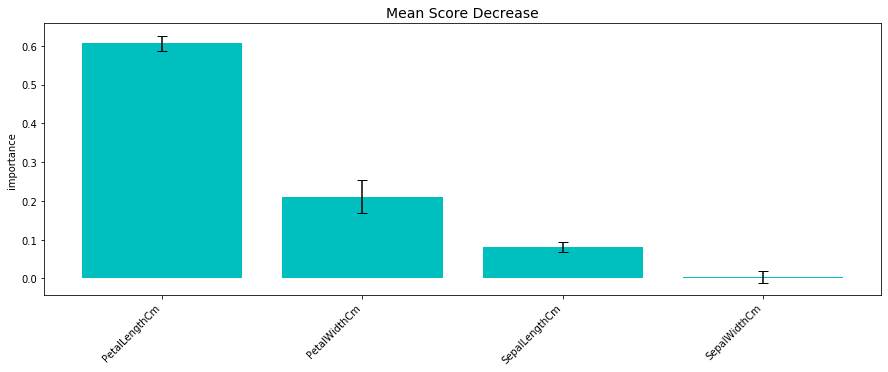

In [10]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)


### EDA

In [12]:
import seaborn as sns

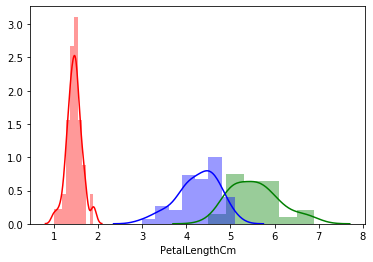

In [15]:
sns.distplot(df.PetalLengthCm[df.Species == "Iris-setosa"], color="r")
sns.distplot(df.PetalLengthCm[df.Species == "Iris-virginica"], color="g")
sns.distplot(df.PetalLengthCm[df.Species == "Iris-versicolor"], color="b")

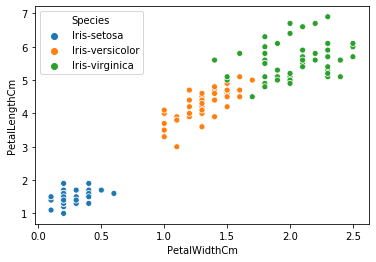

In [18]:
sns.scatterplot("PetalWidthCm", "PetalLengthCm",data=df, hue="Species")